In [1]:
import pandas as pd
from sqlalchemy import create_engine

## Extract CSVs into DataFrames

In [2]:
file = "drinks_data.csv"
file2 = "data_world.csv"

In [3]:
# Loading csv files
drinks = pd.read_csv(file)
drink_age_by_country_by_population = pd.read_csv(file2)

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


## Data Cleanup & Analysis

In [5]:
# Average beer servings across all countries
drinks.beer_servings.mean()

106.16062176165804

In [6]:
# Data for the countries in North America
drinks[drinks.continent=='North America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,North America
11,Bahamas,122,176,51,6.3,North America
14,Barbados,143,173,36,6.3,North America
17,Belize,263,114,8,6.8,North America
32,Canada,240,122,100,8.2,North America
41,Costa Rica,149,87,11,4.4,North America
43,Cuba,93,137,5,4.2,North America
50,Dominica,52,286,26,6.6,North America
51,Dominican Republic,193,147,9,6.2,North America
54,El Salvador,52,69,2,2.2,North America


In [7]:
# Data for the countries in South America
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [8]:
# Average beer serving by continents
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [9]:
# Average beer serving in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()


61.471698113207545

In [10]:
# Average beer serving in Asia
drinks[drinks.continent=='Asia'].beer_servings.mean()

37.04545454545455

In [11]:
# Average beer serving by North America
drinks[drinks.continent=='North America'].beer_servings.mean()

145.43478260869566

In [12]:
# max beer serving in a continent
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [13]:
# count is number of countries in continent and there min, max, mean
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [14]:
# average beer serving by continent
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [15]:
# Data Frame of all the listed countries with restriction and ban on alcohol in 2019.
drink_age_by_country_by_population.head()

,name,onPremiseAge,offPremiseAge,note,pop2019
0,Iran,-1,-1,The alcohol ban was instituted after the 1979 ...,"82,913,906"
1,Afghanistan,-1,-1,NaN,"38,041,754"
2,Kuwait,-1,-1,No info provided by WHO; Alcohol has been bann...,"4,207,083"
3,Libya,-1,-1,NaN,"6,777,452"
4,Maldives,-1,-1,NaN,"530,953"


In [16]:
drink_age_by_country_by_population.dtypes

name             object
onPremiseAge      int64
offPremiseAge     int64
note             object
pop2019          object
dtype: object

# Transform drink_age_by_country_by_population DataFrame

In [24]:
# Creating a filtered dataframe from specific columns
header_cols = ["name", "onPremiseAge", "offPremiseAge", "note","pop2019"]
alcohol_restriction_ban= drink_age_by_country_by_population[header_cols].copy()

# Rename the column headers
alcohol_restriction_ban = alcohol_restriction_ban.rename(columns={"name": "Country",
                                                          "onPremiseAge": "On_Premise_Age",
                                                          "offPremiseAge": "Off_Premise_Age",
                                                                 "note" : "Details_Facts",
                                                                 "pop2019" : "Population_2019"})

# alcohol age restriction and ban in the countries
alcohol_restriction_ban.head(200)

,Country,On_Premise_Age,Off_Premise_Age,Details_Facts,Population_2019
0,Iran,-1,-1,The alcohol ban was instituted after the 1979 ...,"82,913,906"
1,Afghanistan,-1,-1,NaN,"38,041,754"
2,Kuwait,-1,-1,No info provided by WHO; Alcohol has been bann...,"4,207,083"
3,Libya,-1,-1,NaN,"6,777,452"
4,Maldives,-1,-1,NaN,"530,953"
5,Mauritania,-1,-1,NaN,"4,525,696"
6,Bahrain,-1,-1,No info provided by WHO. Alcohol is illegal fo...,"1,641,172"
7,Bangladesh,-1,-1,Alcohol is illegal for Muslims and purchase by...,"163,046,161"
8,Pakistan,-1,-1,Alcohol is illegal for Muslims and consumption...,"216,565,318"
9,Qatar,-1,-1,No info provided by WHO; other sources say tha...,"2,832,067"


In [18]:
# Countries with total ban -1 on alcoholic drinks in 2019

alcohol_restriction_ban[alcohol_restriction_ban.On_Premise_Age==-1]

,Country,On_Premise_Age,Off_Premise_Age,Details_Facts,Population_2019
0,Iran,-1,-1,The alcohol ban was instituted after the 1979 ...,"82,913,906"
1,Afghanistan,-1,-1,NaN,"38,041,754"
2,Kuwait,-1,-1,No info provided by WHO; Alcohol has been bann...,"4,207,083"
3,Libya,-1,-1,NaN,"6,777,452"
4,Maldives,-1,-1,NaN,"530,953"
5,Mauritania,-1,-1,NaN,"4,525,696"
6,Bahrain,-1,-1,No info provided by WHO. Alcohol is illegal fo...,"1,641,172"
7,Bangladesh,-1,-1,Alcohol is illegal for Muslims and purchase by...,"163,046,161"
8,Pakistan,-1,-1,Alcohol is illegal for Muslims and consumption...,"216,565,318"
9,Qatar,-1,-1,No info provided by WHO; other sources say tha...,"2,832,067"


In [19]:
%matplotlib inline

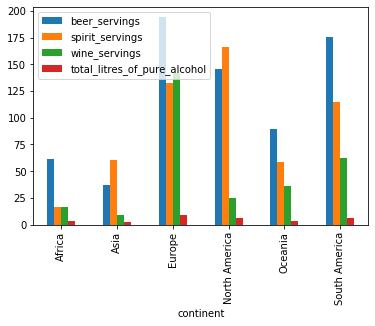

In [20]:
# Bar Graph - alcohol consumption by continents.
drinks.groupby('continent').mean().plot(kind='bar')

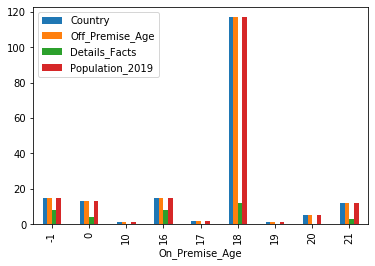

In [22]:
# Bar graph – alcohol age restriction and ban in the countries -1 is a total ban.
alcohol_restriction_ban.groupby('On_Premise_Age').count().plot(kind='bar')